# ID:170104146

# IMPORT dRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT library

In [2]:
import pandas as pd

In [5]:
import torch   

#handling text data
from torchtext.legacy import data  

# LOAD DATASET

In [4]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/soft com lab/Dataset 3.csv', encoding = "ISO-8859-1")

# REMOVE SPECIAL CHARACTERS

In [6]:
import re
def remove(text):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)

In [7]:
dataset['tweets'] = dataset['tweets'].apply(lambda x: remove(x))


In [8]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [9]:
dataset.drop(10313,inplace=True)

In [10]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


# Remove tweets which length less than 5

In [12]:
dataset.drop( dataset[dataset.tweets.str.len() < 5].index, inplace=True)

In [13]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [14]:
dataset.to_csv('data.csv',index=False)

# Design Model

In [15]:
#keras
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [16]:
dataset=pd.read_csv("data.csv")

In [17]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10305,Many sufferers of depression aren't sad they f...,1
10306,No Depression by G Herbo is my mood from now o...,1
10307,What do you do when depression succumbs the br...,1
10308,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [18]:
import tensorflow as tf

In [23]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
from tensorflow.keras.layers import Dense

In [24]:
voc_size=5000
import nltk
import re
from nltk.corpus import stopwords

# Remove stopwords

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset['tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [29]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4526 2979 3938]
 [   0    0    0 ... 3346 4608 2905]
 [   0    0    0 ... 1649  265 4760]
 ...
 [   0    0    0 ... 2407 4996   39]
 [   0    0    0 ...  335 4029 4324]
 [   0    0    0 ...  362  672 3001]]


In [31]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(dataset.sentiment)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [76]:
import matplotlib.pyplot as plt

In [77]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# Define model

In [78]:

model2 = Sequential()
model2.add(Embedding(voc_size,40,input_length=sent_length))
model2.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 13, 32)            10272     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 3, 32)             4128      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1, 32)             1056      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 32)            

# Train Model

In [79]:
history=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
129/129 [==============================] - 2s 9ms/step - loss: 0.3932 - accuracy: 0.8562 - val_loss: 0.2260 - val_accuracy: 0.9345
Epoch 2/10
129/129 [==============================] - 1s 8ms/step - loss: 0.1845 - accuracy: 0.9463 - val_loss: 0.2138 - val_accuracy: 0.9340
Epoch 3/10
129/129 [==============================] - 1s 8ms/step - loss: 0.1359 - accuracy: 0.9594 - val_loss: 0.2392 - val_accuracy: 0.9171
Epoch 4/10
129/129 [==============================] - 1s 8ms/step - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.2543 - val_accuracy: 0.9219
Epoch 5/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0825 - accuracy: 0.9756 - val_loss: 0.3406 - val_accuracy: 0.9049
Epoch 6/10
129/129 [==============================] - 1s 7ms/step - loss: 0.0679 - accuracy: 0.9805 - val_loss: 0.3565 - val_accuracy: 0.9234
Epoch 7/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0608 - accuracy: 0.9818 - val_loss: 0.4052 - val_accuracy: 0.9088
Epoch 

# Plot Loss vs Accuracy Graph

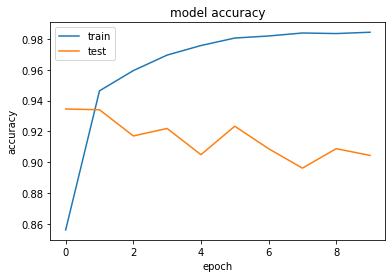

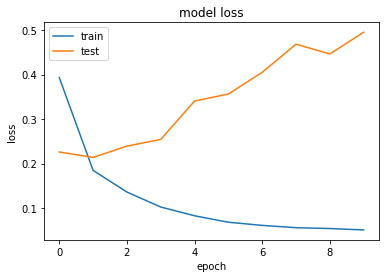

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
y_pred=np.round(model2.predict(X_test))

# Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9044616876818623

# F1 Score

In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9044616876818623

# Precision Score

In [84]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9044616876818623

# Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrice = confusion_matrix(y_test,y_pred)
matrice

array([[1518,   75],
       [ 122,  347]])

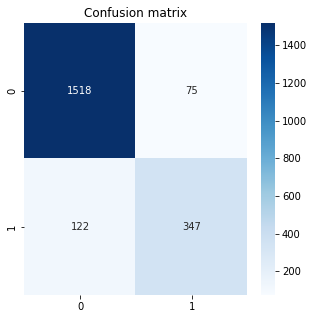

In [86]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

# Total Model Classification

In [87]:
classify_report = classification_report(y_test, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1593
           1       0.82      0.74      0.78       469

    accuracy                           0.90      2062
   macro avg       0.87      0.85      0.86      2062
weighted avg       0.90      0.90      0.90      2062

